# Joining of Datasets on Brand Name

In [17]:
import importlib

import analysis_code.myevaluation
importlib.reload(analysis_code.myevaluation)
import analysis_code.myevaluation as myevaluation

import analysis_code.myutils
importlib.reload(analysis_code.myutils)
import analysis_code.myutils as myutils

import analysis_code.mypytable
importlib.reload(analysis_code.mypytable)
from analysis_code.mypytable import MyPyTable 

import analysis_code.myclassifiers
importlib.reload(analysis_code.myclassifiers)
from analysis_code.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

#import analysis_code.plot_utils
#importlib.reload(analysis_code.plot_utils)

import tabulate
from tabulate import tabulate
import numpy as np

In [12]:
raw_data = MyPyTable()
raw_data2 = MyPyTable()
X = []
Y = []
raw_data = raw_data.load_from_file("california_cosmetics.csv")
raw_data2 = raw_data2.load_from_file("cosmetics_kaggle.csv")
data_joined = raw_data.perform_inner_join(raw_data2, ["BrandName"])
duplicates = data_joined.find_duplicates(["BrandName"])
data_joined.drop_rows(duplicates)
data_joined.save_to_file("cosmetics_clean.csv")
row, col = data_joined.get_shape()
print("number of rows ", row)
print("number of cols ", col)

number of rows  13
number of cols  32


#### Based on the lack of matching columns we decided to move away from using the cosmetics kaggle data set and instead are splitting the data set in order to test our classifiers. The size of our dataset is sufficient due to it being more than 100,000 entries that need to be sorted through.

# Splitting and Training Data

In [13]:
subset = MyPyTable().load_from_file("california_cosmetics_removed_rows.csv")
row, col = subset.get_shape()
print("number of rows ", row)
print("number of cols ", col)

number of rows  114635
number of cols  6


#### For this we needed to pull a subset of data from the california cosmetics data set since the processing time of the whole set took too long for the project to be efficient. In the future, we are considering dropping unwanted columns so our algorithm does not have to work as hard.

In [ ]:
subset = subset.remove_rows_with_missing_values()
row, col = subset.get_shape()
print("number of rows ", row)
print("number of cols ", col)

number of rows  114595
number of cols  6


In [15]:
y = subset.get_column("ChemicalName")
columns = ["CompanyName", "BrandName", "PrimaryCategory", "SubCategory"]
X = []
companyNames = subset.get_column("CompanyName")
brandNames = subset.get_column("BrandName")
primaryCategories = subset.get_column("PrimaryCategory")
subCategories = subset.get_column("SubCategory")
for i,val in enumerate(companyNames):
    X.append([companyNames[i], brandNames[i], primaryCategories[i],subCategories[i]])

In [32]:
unique_vals, counts = myutils.get_frequency(y)
print(unique_vals)
print(counts)
drugs = []
for i, val in enumerate(unique_vals):
    if counts[i] > 1000:
        drugs.append(val)

print(drugs)
index = subset.column_names.index("ChemicalName")
subset2 = MyPyTable()
subset2.column_names = subset.column_names
for inst in subset.data:
    for drug in drugs:
        if inst[index] == drug:
            subset2.data.append(inst)
y2 = subset2.get_column("ChemicalName")
chemical_indices = myutils.group_by(y2)

['1,4-Dioxane', '2,2-Bis(bromomethyl)-1,3-propanediol', '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)', '2-Propyleneacrolein', 'Acetaldehyde', 'Acetic acid, retinyl ester', 'Acetylsalicylic acid', 'Acrylamide', 'All-trans retinoic acid', 'Aloe vera, non-decolorized whole leaf extract', 'Aloe vera, whole leaf extract', 'Arsenic (inorganic arsenic compounds)', 'Arsenic (inorganic oxides)', 'Aspirin', 'Avobenzone', 'Benz[a]anthracene', 'Benzene', 'Benzo[a]pyrene', 'Benzophenone', 'Benzophenone-2', 'Benzophenone-3', 'Benzophenone-4', 'Benzyl chloride', 'Bisphenol A (BPA)', 'Butylated hydroxyanisole', 'C.I. Acid Red 114', 'Cadmium and cadmium compounds', 'Caffeic acid', 'Caffeine', 'Carbon black', 'Carbon black (airborne, unbound particles of respirable size)', 'Carbon-black extracts', 'Chromium (hexavalent compounds)', 'Coal Tar', 'Coal tar extract', 'Coal tar solution', 'Coal tars', 'Cocamide', 'Cocamide DEA', 'Cocamide MEA', 'Cocamide diethanolamine', 'Cocamide diethan

In [33]:
np.random.seed(0)
chosen_indices = []
for chemical in chemical_indices:
    if len(chemical) < 2000:
        chosen_indices.append(chemical)
    else:
        indices = np.random.choice(chemical, 2000, False)
        chosen_indices.append(indices)
for chemical in chosen_indices:
    print(len(chemical))

1888
1758
1362
1918
2000
1181
2000
1548
2000


In [41]:
final_subset = MyPyTable()
final_subset.column_names = subset.column_names
for chemical in chosen_indices:
    for inst in chemical:
        final_subset.data.append(subset2.data[inst])
final_subset.save_to_file("final_subset.csv")
final_y = final_subset.get_column("ChemicalName")
for i, chem in enumerate(final_y):
    if chem == "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retin":
        chem[i] = "Retinon/retinyl esters"
print(final_y)

['Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxyanisole', 'Butylated hydroxya

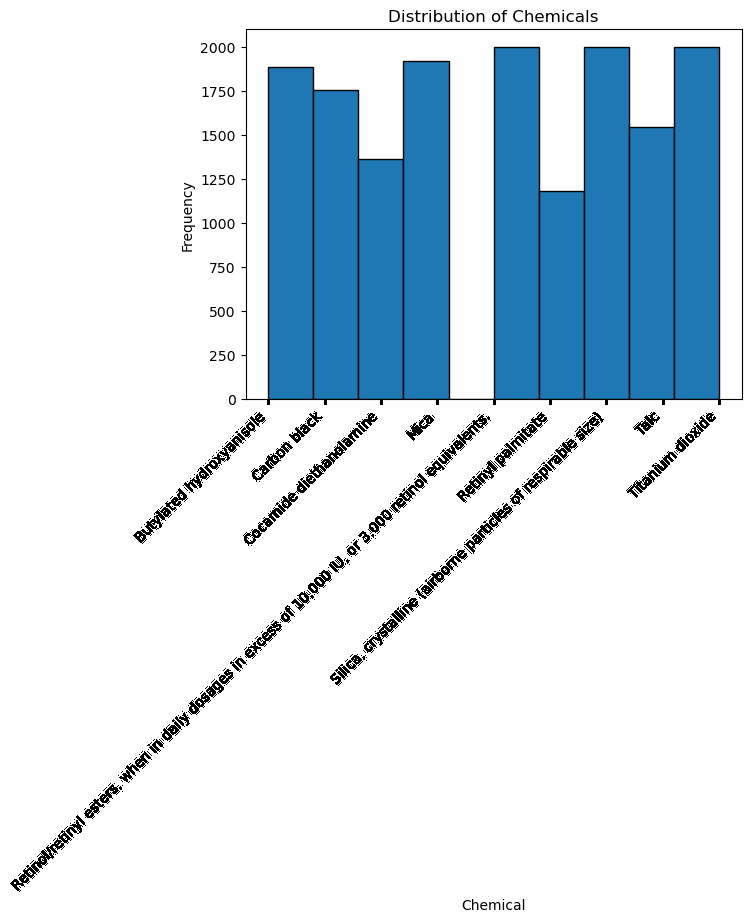

In [42]:
myutils.histogram(final_y, "Chemical", "Frequency", "Distribution of Chemicals", xticks=final_y)

In [6]:
#initializing classifiers
naive_class = MyNaiveBayesClassifier()
knn_class = MyKNeighborsClassifier()
#splitting data
split = myevaluation.stratified_kfold_split(X, y, 10, 0)
y_tests = []
y_pred_naive = []
#training the data and then predicting on test sets
for fold in split:
    X_train, X_test, y_train, y_test = myutils.get_train_test(X, y, fold)
    naive_class.fit(X_train, y_train)
    y_pred_naive.extend(naive_class.predict(X_test))
    y_tests.extend(y_test)

In [7]:
#printing the metrics
print("================================================")
print("Naive Bayes Metrics")
print("================================================")
myutils.print_metrics(y_pred_naive, y_tests)

Naive Bayes Metrics
Accuracy: 0.59
Error Rate: 0.41
Precision: 0.69
Recall: 0.34
F1 Score: 0.46
Confusion Matrix:
                                                                                                       1,4-Dioxane    2,2-Bis(bromomethyl)-1,3-propanediol    2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)    2-Propyleneacrolein    Acetaldehyde    Acetic acid, retinyl ester    Acetylsalicylic acid    Acrylamide    All-trans retinoic acid    Aloe vera, non-decolorized whole leaf extract    Aloe vera, whole leaf extract    Arsenic (inorganic arsenic compounds)    Arsenic (inorganic oxides)    Aspirin    Avobenzone    Benz[a]anthracene    Benzene    Benzo[a]pyrene    Benzophenone    Benzophenone-2    Benzophenone-3    Benzophenone-4    Benzyl chloride    Bisphenol A (BPA)    Butylated hydroxyanisole    C.I. Acid Red 114    Cadmium and cadmium compounds    Caffeic acid    Caffeine    Carbon black    Carbon black (airborne, unbound particles of respirable size)  

In [8]:
knn_class = MyKNeighborsClassifier()
#splitting data
split = myevaluation.stratified_kfold_split(X, y, 10, 0)
y_tests = []
y_pred_knn = []
#training the data and then predicting on test sets
for fold in split:
    X_train, X_test, y_train, y_test = myutils.get_train_test(X, y, fold)
    knn_class.fit(X_train, y_train)
    y_pred_knn.extend(knn_class.predict(X_test))
    y_tests.extend(y_test)

KeyboardInterrupt: 

In [ ]:
print("================================================")
print("kNN Metrics")
print("================================================")
myutils.print_metrics(y_pred_knn, y_tests)

In [18]:
tree_class = MyDecisionTreeClassifier()
#splitting data
split = myevaluation.stratified_kfold_split(X, y, 10, 0)
y_tests = []
y_pred_tree = []
#training the data and then predicting on test sets
for fold in split:
    X_train, X_test, y_train, y_test = myutils.get_train_test(X, y, fold)
    tree_class.fit(X_train, y_train)
    y_pred_tree.extend(tree_class.predict(X_test))
    y_tests.extend(y_test)

TypeError: '<' not supported between instances of 'float' and 'str'

#### Based on the provided metrics, we can see the dataset is heavily skewed toward Titanium dioxide. Both the KNN and Naive Bayes algorithms are able to pick up on this skew and Naive Bayes has a recognition rate of 97.85% for Titanium dioxide while KNN had a recognition rate of 80.86%.

In [ ]:
#printing the classification report (bonus)
print("================================================")
print("Naive Bayes Report")
print("================================================")
print(myevaluation.classification_report(y_tests, y_pred_naive, False))
print("================================================")
print("kNN Report")
print("================================================")
print(myevaluation.classification_report(y_tests, y_pred_knn, False))

Naive Bayes Report
+-----------------------------------------------------------------------------------------------------+-------------+----------+------------+-----------+
|                                                                                                     | precision   | recall   |   f1-score |   support |
+=====================================================================================================+=============+==========+============+===========+
| Butylated hydroxyanisole                                                                            | 0.0         | 0.0      |       0    |         2 |
+-----------------------------------------------------------------------------------------------------+-------------+----------+------------+-----------+
| Chromium (hexavalent compounds)                                                                     | 0.0         | 0.0      |       0    |         1 |
+--------------------------------------------------------

# Data Visualization

493


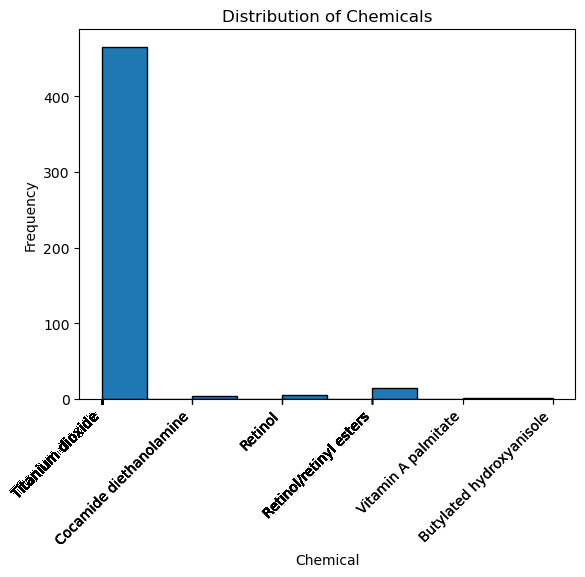

In [ ]:
for i, label in enumerate(y):
    if label == "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.":
        y[i] = "Retinol/retinyl esters"
values, counts = myutils.get_frequency(y)
for i, val in enumerate(values):
    if counts[i] < 2:
        for inst in y:
            if inst == val:
                y.remove(inst)
print(len(y))
myutils.histogram(y, "Chemical", "Frequency", "Distribution of Chemicals", xticks=y)